In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('../data/gdp4c.csv', index_col=0)
df.head()

,SGP,THA,USA,VNM
1960,704462302.4,2.760747e+09,5.433000e+11,NaN
1961,764308114.5,3.034044e+09,5.633000e+11,NaN
1962,825885273.7,3.308913e+09,6.051000e+11,NaN
1963,917222004.4,3.540403e+09,6.386000e+11,NaN
1964,893734483.2,3.889130e+09,6.858000e+11,NaN


In [2]:
df.tail()

,SGP,THA,USA,VNM
2013,3.044540e+11,4.203330e+11,1.669150e+13,1.712220e+11
2014,3.115390e+11,4.073390e+11,1.742760e+13,1.862050e+11
2015,3.040980e+11,4.013990e+11,1.812070e+13,1.932410e+11
2016,3.097640e+11,4.117550e+11,1.862450e+13,2.052760e+11
2017,3.239070e+11,4.552210e+11,1.939060e+13,2.238640e+11


In [3]:
df.describe()
df.shape

(58, 4)

In [4]:
df.isnull().sum()
# มีข้อมูลว่าง

SGP     0
THA     0
USA     0
VNM    25
dtype: int64

e:\workspace\machine_learning\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
e:\workspace\machine_learning\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
e:\workspace\machine_learning\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

Text(0, 0.5, 'GDP')

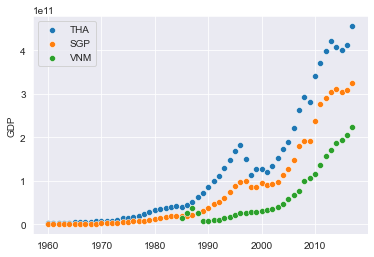

In [5]:
sns.set_style('darkgrid')
sns.scatterplot(df.index, df['THA'], label='THA')
sns.scatterplot(df.index, df['SGP'], label='SGP')
sns.scatterplot(df.index, df['VNM'], label='VNM')
plt.ylabel('GDP')

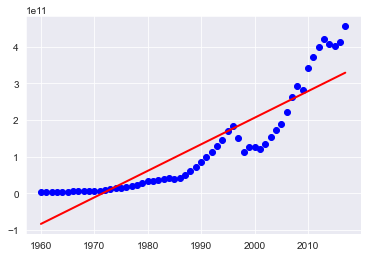

In [6]:
# train
x = df.index.values.reshape(-1, 1)
y = df['THA']
model = LinearRegression()
model.fit(x, y)
predict = model.predict(x)
plt.scatter(x, y, color='b')
plt.plot(x, predict, linewidth='2', color='r')
plt.show()

In [7]:
from sklearn.metrics import r2_score
# ประเมินความแม่น
from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np
np.sqrt(mean_squared_error(y, predict))

58032284468.14501

In [8]:


print('R2 = {:.5f} '.format(model.score(x, y)))
print('R2 = {:.5f} '.format(r2_score(y, predict)))

print('MSE = {:.4e} '.format(mean_squared_error(y, predict)))
print('RMSE = {:.4e} '.format(np.sqrt(mean_squared_error(y, predict))))

R2 = 0.81300 
R2 = 0.81300 
MSE = 3.3677e+21 
RMSE = 5.8032e+10 


In [9]:
# ทำนายว่าปี 2020 จะมี gdp เท่าไหร่
predict2020 = model.predict([[2020]])
predict2020
# ไม้แม่น ของจริงได้ 501.8 billion USD

array([3.50427352e+11])

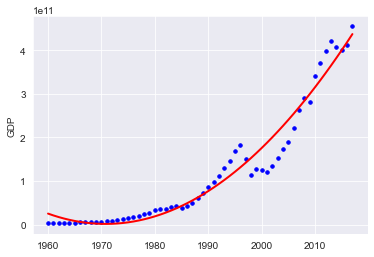

In [10]:
poly_feature = PolynomialFeatures(degree=2)
x_poly = poly_feature.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

y_poly_pred = model.predict(x_poly)


sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = 6,4

plt.scatter(x, y, color='b',s=12)
plt.plot(x, y_poly_pred, linewidth='2', color='r')
plt.ylabel('GDP')

plt.show()

In [11]:
# ประเมินความแม่นยำ
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print('R2 = {:.5f} '.format(model.score(x_poly, y)))
print('R2 = {:.5f} '.format(r2_score(y, y_poly_pred)))

print('MSE = {:.4e} '.format(mean_squared_error(y, y_poly_pred)))
print('RMSE = {:.4e} '.format(np.sqrt(mean_squared_error(y,  y_poly_pred))))

R2 = 0.95797 
R2 = 0.95797 
MSE = 7.5696e+20 
RMSE = 2.7513e+10 


In [12]:
x_input = [[2015], [2018], [2020], [2010]]
y_poly_pred = model.predict(poly_feature.fit_transform(x_input))
y_poly_pred

for val in y_poly_pred:
    print('{:.4e}'.format(val))

4.0035e+11
4.5629e+11
4.9563e+11
3.1526e+11
